In [78]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
# np的方差 是除以n而不是n-1

# 数据的概括性度量
    
![数据的概括性度量](./img/data_general_measure.png)

## 集中趋势的度量
### 众数

In [2]:
data=pd.read_excel('data/例4.3.xlsx',sep='\t',header=0)
data.head()

,月收入
0,1080
1,750
2,1080
3,1080
4,850


In [3]:
sts.mode(data.values)[0][0]

array([1080], dtype=int64)

### 中位数

In [4]:
np.median(data)

1080.0

### 四分位数

In [5]:
#下四分 中位数 上四分
np.percentile(data, (25, 50, 75), interpolation='midpoint')

array([ 960., 1080., 1250.])

### 平均数

In [6]:
dmean = np.mean(data)
dmean

月收入    1186.666667
dtype: float64

In [7]:
data1=pd.read_excel('data/例4.7.xlsx',sep='\t',header=0).drop([0],axis=0)
data1.head()

,按销售量分组 (台),组中值,频数,Unnamed: 3
1,140~150,145,4.0,580.0
2,150~160,155,9.0,1395.0
3,160~170,165,16.0,2640.0
4,170~180,175,27.0,4725.0
5,180~190,185,20.0,3700.0


In [8]:
np.mean(data1)

频数\n            21.818182
Unnamed: 3    4036.363636
dtype: float64

### 加权平均数

In [9]:
elements = np.delete(data1.values[:,1], -1)
weights = np.delete(data1.values[:,2], -1)
np.sum(np.multiply(elements,weights))/np.sum(weights)

185.0

In [10]:
np.average(elements, weights=weights)

185.0

### 几何平均数

In [11]:
data2 = np.array([0.045,0.021,0.255,0.019])+1
data2

array([1.045, 1.021, 1.255, 1.019])

In [12]:
sts.gmean(data2)

1.0807866848335959

## 离散程度的度量
### 异众比率

In [13]:
data3=pd.read_excel('data/例3.3.xlsx',sep='\t',header=0)
data3.head()

,顾客性别,饮料类型
0,女,碳酸饮料
1,男,绿茶
2,男,矿泉水
3,女,矿泉水
4,男,碳酸饮料


In [149]:
data3 = np.array([1,2,2,2,2,3,4])
Vr = 1-sts.mode(data3)[1][0]/len(data3)
Vr

0.4285714285714286

### 四分位差

In [15]:
print("四分位75%："+str(np.percentile(data,75)))
print("四分位25%："+str(np.percentile(data,25)))
print("四分位差："+str(np.percentile(data,75) - np.percentile(data,25)))

四分位75%：1250.0
四分位25%：960.0
四分位差：290.0


### 极差

In [16]:
print(np.ptp(data3))
print(np.max(data3)-np.min(data3))

3
3


### 平均差

In [17]:
dmean3 = np.mean(data3)
np.sum(np.abs(data3-dmean3))/len(data3)

0.6938775510204082

### 方差/标准差

In [18]:
print(data3.var())
print(data3.std())

0.7755102040816327
0.880630571852711


### 标准化/ z分数

In [19]:
dstd = data.std()
(data-dmean.values)/dstd.values

,月收入
0,-0.269675
1,-1.103983
2,-0.269675
3,-0.269675
4,-0.851162
5,-0.573060
6,2.056273
7,0.160120
8,1.120837


### 离散系数

In [34]:
data4=pd.read_excel('data/例4.14.xlsx',sep='\t',header=0)
data4.head()

,姓名,国家,预赛成绩,决赛10枪成绩（环）,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,纳塔利娅·帕杰林娜,俄罗斯,391,10.0,8.5,10.0,10.2,10.6,10.5,9.8,9.7,9.5,9.3
1,郭文珺,中国,390,10.0,10.5,10.4,10.4,10.1,10.3,9.4,10.7,10.8,9.7
2,卓格巴德拉赫·蒙赫珠勒,蒙古,387,9.3,10.0,8.7,8.3,9.2,9.5,8.5,10.7,9.2,9.2
3,妮诺·萨卢克瓦泽,格鲁吉亚,386,9.8,10.3,10.0,9.5,10.2,10.7,10.4,10.6,9.1,10.8
4,维多利亚·柴卡,白俄罗斯,384,9.3,9.4,10.4,10.1,10.2,10.5,9.2,10.5,9.8,8.6


In [138]:
dataTemp4 = data4.values[:,3:]
dlen4 = len(data4)
dmean4= dataTemp4.mean(axis=1)
dstr4 = dataTemp4.astype(np.float64).std(axis=1)
dataVs4= dstr4/dmean4
df = pd.DataFrame(np.concatenate((data4.values[:,0:2],np.vstack((dmean4,dstr4,dataVs4)).reshape(-1,order='F').reshape(-1,3)),axis=1))
df.columns = ['name', 'country', 'mean', 'str', 'Vs']
df

,name,country,mean,str,Vs
0,纳塔利娅·帕杰林娜,俄罗斯,9.81,0.583866,0.0595175
1,郭文珺,中国,10.23,0.414849,0.0405522
2,卓格巴德拉赫·蒙赫珠勒,蒙古,9.26,0.671118,0.072475
3,妮诺·萨卢克瓦泽,格鲁吉亚,10.14,0.518073,0.051092
4,维多利亚·柴卡,白俄罗斯,9.8,0.616441,0.0629022
5,莱万多夫斯卡·萨贡,波兰,9.73,0.695773,0.071508
6,亚斯娜·舍卡里奇,塞尔维亚,9.69,0.338969,0.0349813
7,米拉·内万苏,芬兰,9.65,0.438748,0.0454661


## 偏态

In [169]:
print(data3)
sts.skew(np.bincount(data3))

[1 2 2 2 2 3 4]


1.1731251294063556

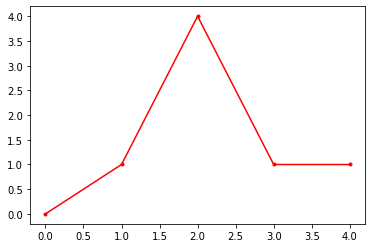

In [170]:
plt.plot(np.bincount(data3), 'r.-')

## 峰态

In [192]:
sts.kurtosis(np.bincount(data3))

-0.06899810964083297